# 22_Plot_Dice

This program demonstrates how to plot data. This first imports the proper modules, then imports some data from `21_Save_Load_file_Dice.py` and plots the data.

In [1]:
## Library imports

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb # Combination function

# The sum of n s-sided dices

The probability to obtain a score of $p$ when throwing $n$ dices with $s$ faces is :
$$
P(p,n,s) = \frac{1}{s^n}\sum_{k=0}^{(p-n)/s} (-1)^k \binom{n}{k}\binom{p-sk-1}{n-1}.
$$

See [Wolfram MathWorld](https://mathworld.wolfram.com/Dice.html).

# Python functions

In Python you can define a function that you can call by its name anywhere, even in other functions. The function can accept input arguments and can return something, or it can also just carry out some algorithm, transform variables, etc. Function is just any code wrapped into a function for convenience. Below is an example of a python function definition.

Functions are particularly convenient if you have to use the same code more than one time. This also keeps the code tidy and makes it easy to comment and debug. Think about the library imports we have just done (numpy, matplotlib, scipy) as functions we have imported. There are functions everywhere in Python ! And it is very convenient to import them rather than copy/paste the code everytime, you do not want to have a ton of code in the beginning of your program. Think about mathematical functions, you do not want to define cosine or exponential everytime you use it in your calculator or computer right ?

Now let's go back to the mathematical problem with have been giving to ourselves. I want to retrieve the entire probability mass function, so the above mentionned function will be implemented in a Python function in order to retrieve a probability mass function (then we will plot $P(n,s)$ as a function of $p$.).

In [5]:
def dices_prob_mass(n, s):
    """ Probability distribution of the score given by n dices with s faces.

    Args:
        n (int): Number of dices.
        s (int): Number of faces of each dice.
    Returns:
        prob (list): Probability of each outcome.
        outcomes (list): Possible outcomes.
    References:
        https://mathworld.wolfram.com/Dice.html
    """

    outcomes = np.arange(n, n*s + 1) # all possible outcomes
    prob = []
        
    for p in outcomes: # for each possible outcome
        prob_tmp = 0
        for k in range(0, (p-n)//s + 1): # summation over k
            prob_tmp += (-1)**k * comb(n, k) * comb(p - s*k - 1, n - 1)

        prob_tmp *= 1/(s**n) # prefactor

        prob.append(prob_tmp) # append to the probability list

    return prob, outcomes

In [4]:
# We have given a docstring to the function so that when you call help on it, you get information about how to use it.
# This is == V  E  R  Y  == useful when you have to use functions from libraries you do not know well.
# Doing a proper docstring is a <= G  O  O  D  => practice when you define your own functions.

help(dices_prob_mass)

Help on function dices_prob_mass in module __main__:

dices_prob_mass(n, s)
    Probability distribution of the score given by n dices with s faces.
    
    Args:
        n (int): Number of dices.
        s (int): Number of faces of each dice.
    Returns:
        prob (list): Probability of each outcome.
        outcomes (list): Possible outcomes.
    References:
        https://mathworld.wolfram.com/Dice.html



In [ ]:
## Imports data from previous notebook

# We need to run some dice experiments first to have data to plot
# Run the program 21_Save_Load_file_Dice.py to create the data file

filename = '../dices_20251110-154554'  # Change this to your actual filename

with np.load(filename+'.npz') as data:
    result = data['result']
    result_mean = data['result_mean']
    result_std = data['result_std']
    dices = int(data['dices'])
    faces = int(data['faces'])
    throw = int(data['throw'])

In [4]:
# checking data consistency

print(f'Loaded data from file {filename} .')
print(f'Number of dices : {dices:02d}, Dice size: {faces:02d}, Number of throws: {throw}.')
print(f'Mean of results: {result_mean}, Standard deviation of results: {result_std}.')
print(f'Results should be between {dices} and {dices*faces}.')

print()
print(len(result), 'throws loaded.')
print(np.mean(result), np.std(result))  # just to double-check should be identical to loaded values
print(np.min(result), np.max(result))  # just to see the range of results

Loaded data from file ../dices_20251110-154554 .
Number of dices : 02, Dice size: 06, Number of throws: 100.
Mean of results: 7.29, Standard deviation of results: 2.337926431691126.
Results should be between 2 and 12.

100 throws loaded.
7.29 2.337926431691126
2 12


## Plot histogram of throws from the dice experiment

`matplotlib.pyplot.hist` computes *and* plots a histogram. If you want to compute it separately use `matplotlib.pyplot.histogram`, then you can plot it using `matplotlib.pyplot.step` or `matplotlib.pyplot.hist`.

In [ ]:
# Theoretical distribution and throw average
y, outcomes = dices_prob_mass(dices, faces)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

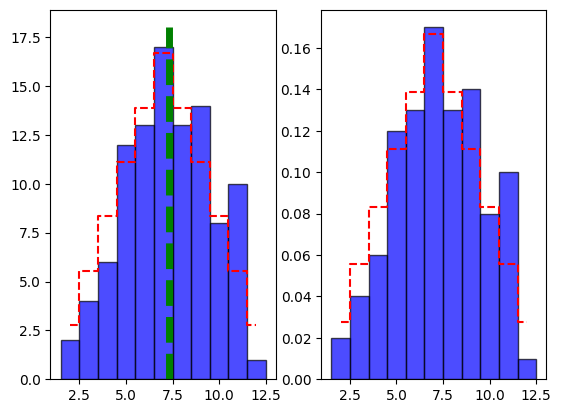

In [45]:
## Plot histogram of throws from the dice experiment

# matplotlib.pyplot.hist computes and plots a histogram.

# create the figure and the two axis
fig, ax = plt.subplots(1,2,num='Histogram of Dice Throws',clear=True)

# plot the histogram in the first axis (counts)
ax[0].hist(result, bins=np.arange(dices,dices*faces+2)-0.5,
        density=False,
        alpha=0.7, color='blue', edgecolor='black')

# Theoretical distribution scaled to number of throws
ax[0].step(outcomes, np.array(y) * throw, where='mid', color='r', linestyle='--', label='Theoretical distribution')

# Average of the throws
ax[0].vlines(np.mean(result), 0, np.max(result)*1.5, color='g', linestyle='--', lw=5, label='Throw Average')


# plot the histogram in the second axis (probability density)
ax[1].hist(result, bins=np.arange(dices,dices*faces+2)-0.5,
        density=True,
        alpha=0.7, color='blue', edgecolor='black')

# Theoretical distribution
ax[1].step(outcomes, np.array(y), where='mid', color='r', linestyle='--', label='Theoretical distribution')

In [58]:
# Change default font size in plots
plt.rcParams.update({'font.size': 22})

# Set figure size to A4 size (inches)
plt.rcParams['figure.figsize'] = 11.69,8.27

# For grid spacing
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

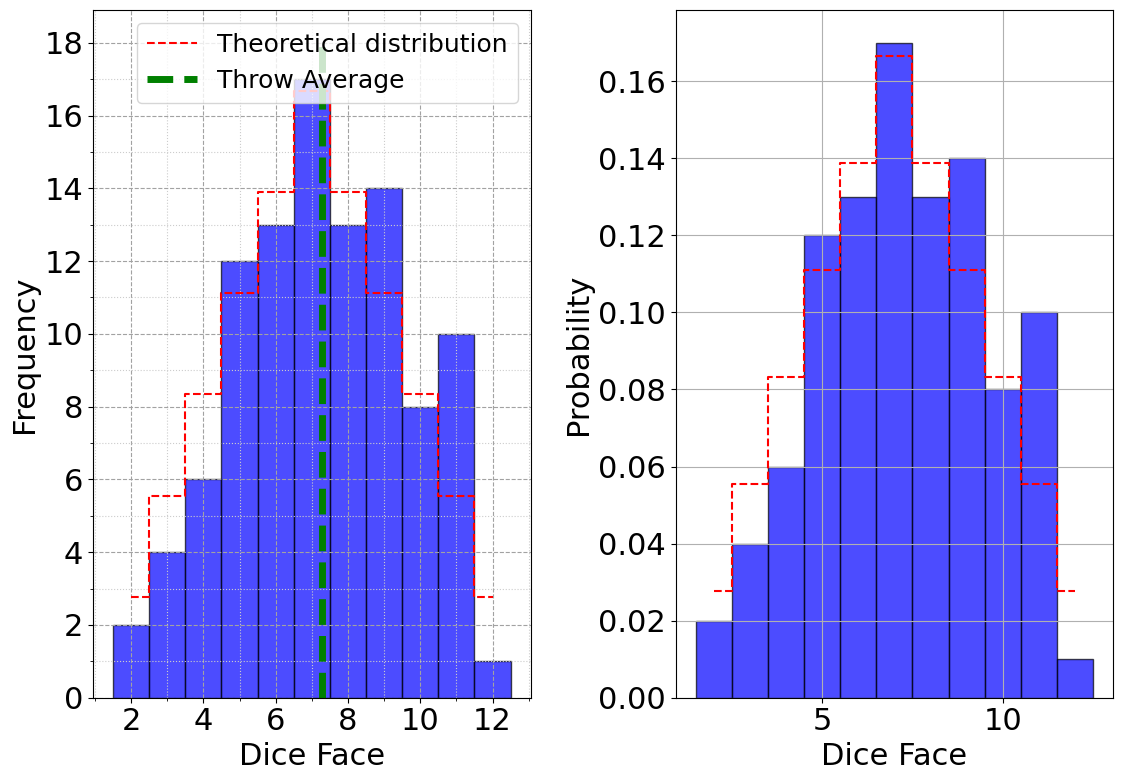

In [72]:
## Plot histogram of throws from the dice experiment

# matplotlib.pyplot.hist computes and plots a histogram.

# create the figure and the two axis
fig, ax = plt.subplots(1,2,num='Histogram of Dice Throws',clear=True)

# plot the histogram in the first axis (counts)
ax[0].hist(result, bins=np.arange(dices,dices*faces+2)-0.5,
        density=False,
        alpha=0.7, color='blue', edgecolor='black')

# Theoretical distribution scaled to number of throws
ax[0].step(outcomes, np.array(y) * throw, where='mid', color='r', linestyle='--', label='Theoretical distribution')

# Average of the throws
ax[0].vlines(np.mean(result), 0, np.max(result)*1.5, color='g', linestyle='--', lw=5, label='Throw Average')


# plot the histogram in the second axis (probability density)
ax[1].hist(result, bins=np.arange(dices,dices*faces+2)-0.5,
        density=True,
        alpha=0.7, color='blue', edgecolor='black')

# Theoretical distribution
ax[1].step(outcomes, np.array(y), where='mid', color='r', linestyle='--', label='Theoretical distribution')

# Now some cosmetics

# set x labels
ax[0].set_xlabel('Dice Face')
ax[1].set_xlabel('Dice Face')

# set y labels
ax[0].set_ylabel('Frequency')
ax[1].set_ylabel('Probability')

# Change major ticks to show every 2.
ax[0].xaxis.set_major_locator(MultipleLocator(2))
ax[0].yaxis.set_major_locator(MultipleLocator(2))

# Change minor ticks to show every 1. (2/2 = 1)
ax[0].xaxis.set_minor_locator(AutoMinorLocator(2))
ax[0].yaxis.set_minor_locator(AutoMinorLocator(2))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax[0].grid(which='major', color="#A2A2A2", linestyle='--')
ax[0].grid(which='minor', color='#CCCCCC', linestyle=':')

ax[1].grid()

ax[0].legend(fontsize=18)

plt.tight_layout()

In [ ]:
help(plt.subplots)

In [ ]:
## Now try to plot the functions in an independant window
# Usually you need some command like this
%matplotlib qt